# Case Study 

In [2]:
import os
print(os.path.dirname(os.__file__) + r'\Scripts')


c:\Program Files\Python311\Lib\Scripts


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data= pd.read_csv("loan_tap.csv")
data.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# 1. Define problem statement and perform Exploratory Data Analysis


##### Given a set of attributes for an Individual, determine if a credit line should be extended to them.

### a. Observations on shape of data and data types of all attributes

In [24]:
target_variable=data['loan_status']
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

### b. Check for missing value (if any)

In [25]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

### c. Display the statistical summary

In [26]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


### d. Univariate Analysis and Bivariate Analysis of all the attributes

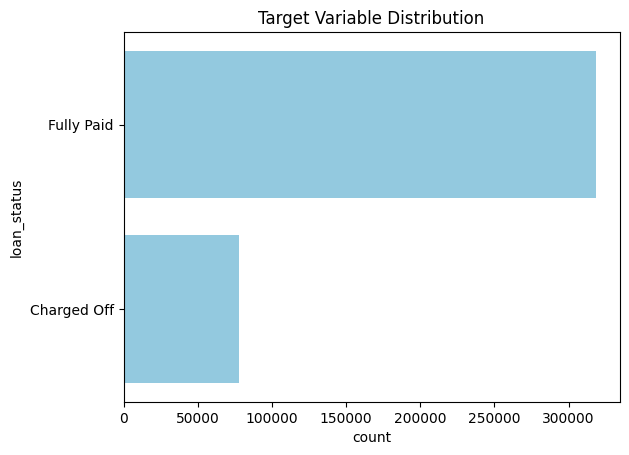

In [27]:
sns.countplot(target_variable, color='skyblue')
plt.title("Target Variable Distribution")
plt.show()


#### Univeriate

In [28]:
numerical_data= data.select_dtypes(include=["int","float"]).columns
categorical_data= data.select_dtypes(include=['object']).columns

data[numerical_data]


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,23.0,0.0,0.0
396026,21000.0,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,8.0,1.0,0.0
396027,5000.0,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,23.0,0.0,0.0
396028,21000.0,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,20.0,5.0,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

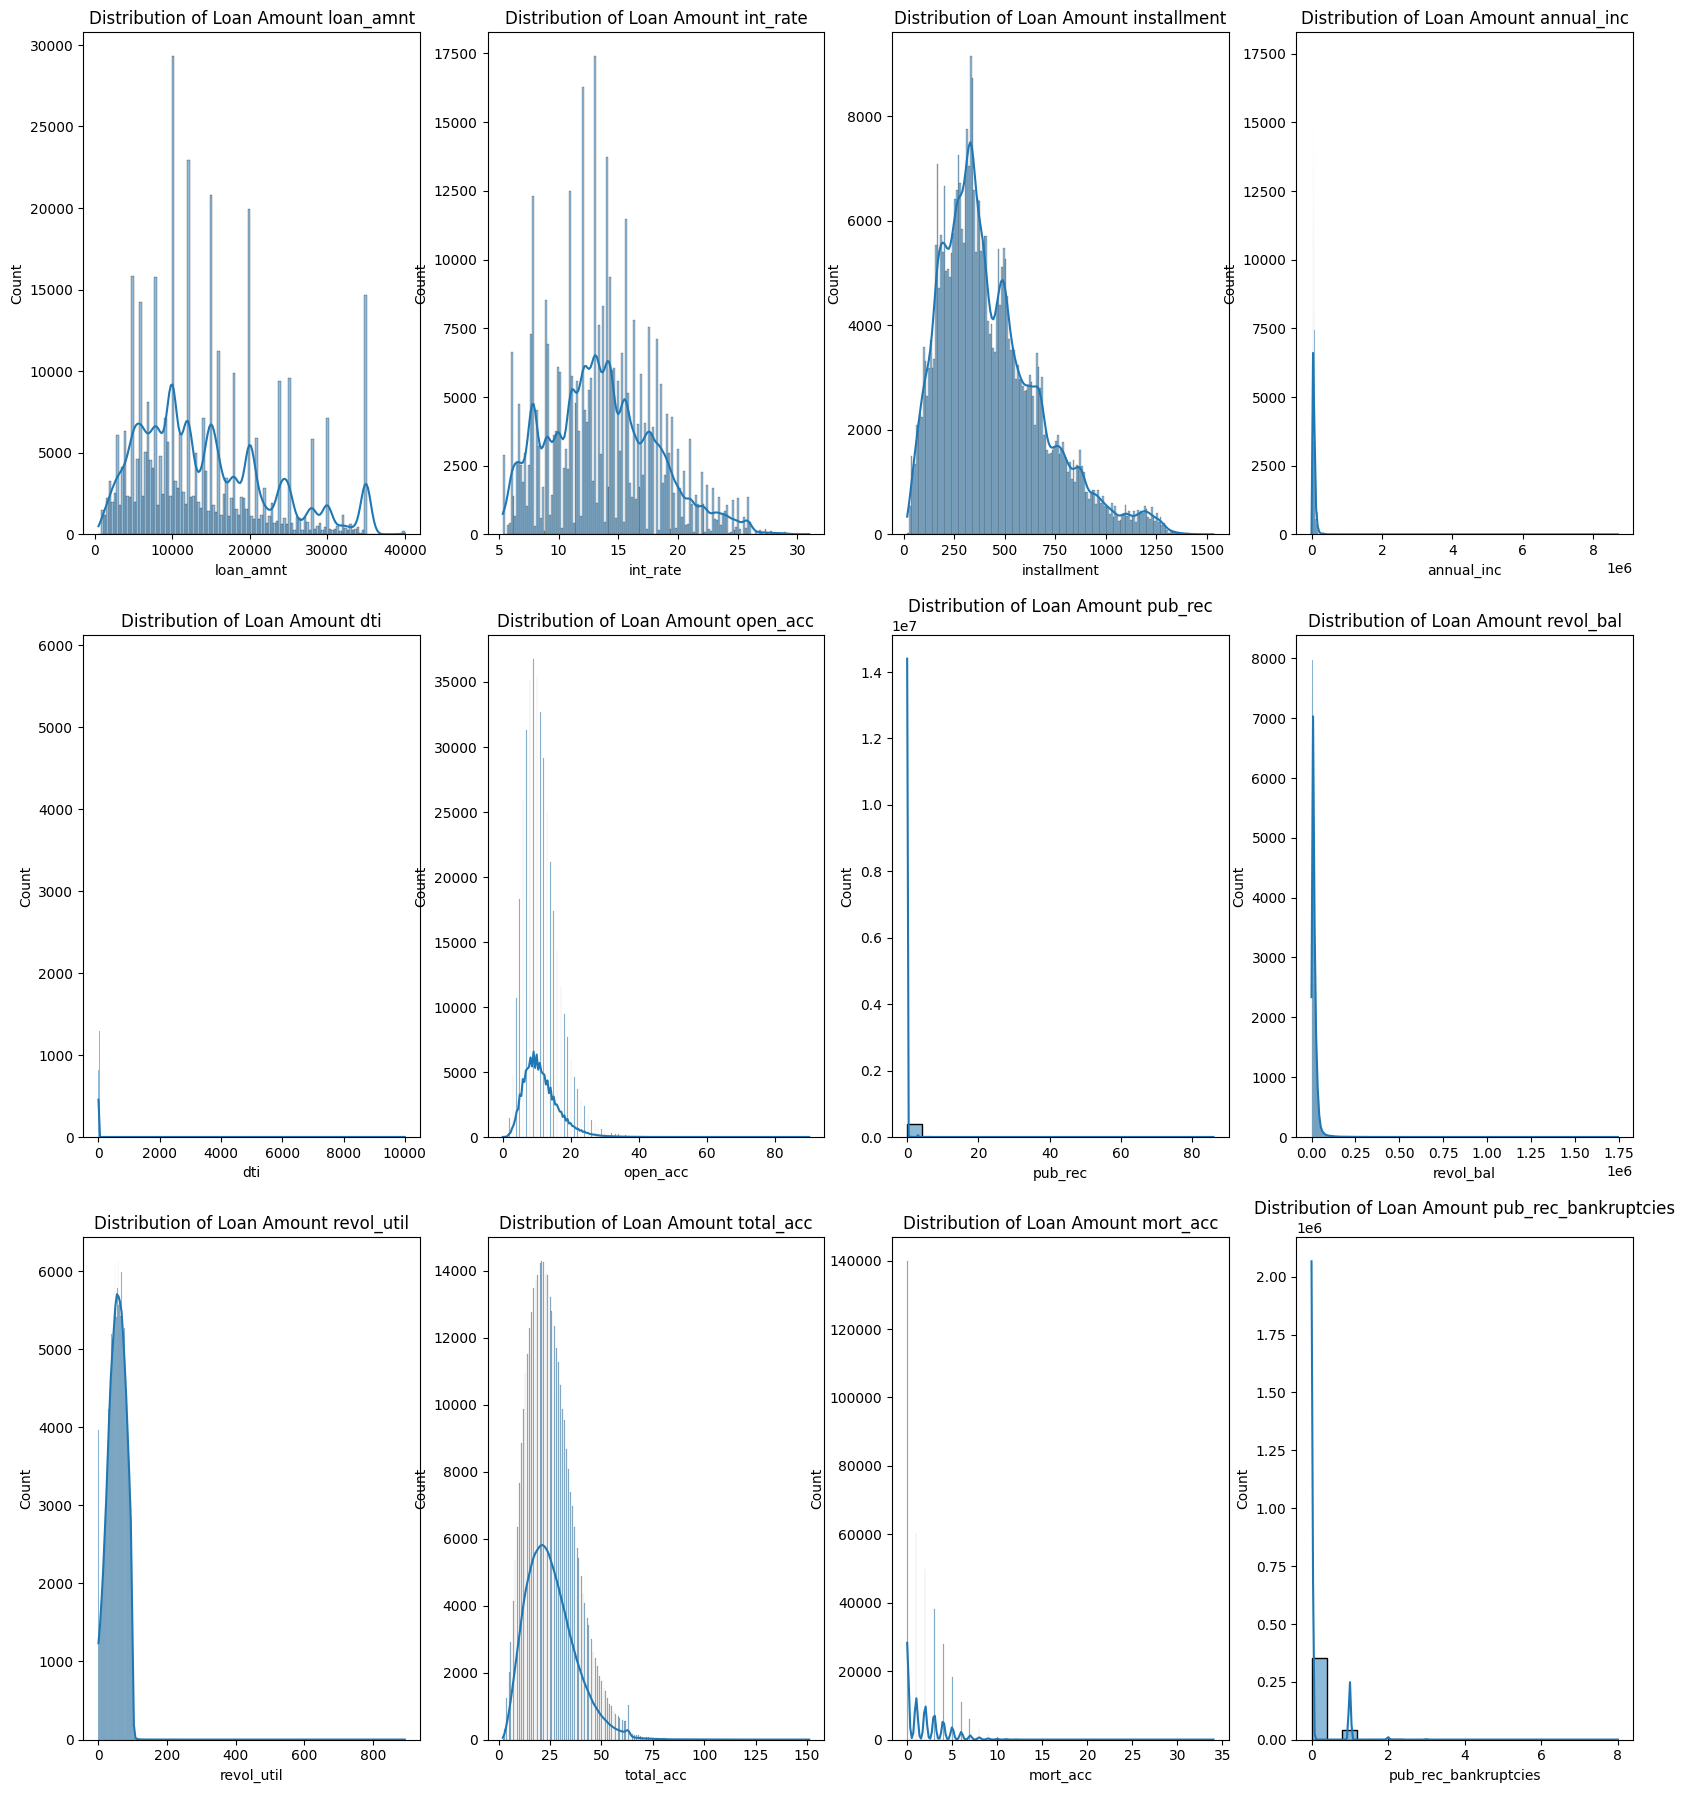

In [29]:
i = 1
plt.figure(figsize=(20,30))
for col in numerical_data:
    plt.subplot(4,4,i)
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of Loan Amount {col}")
    i+=1

plt.show

    
      

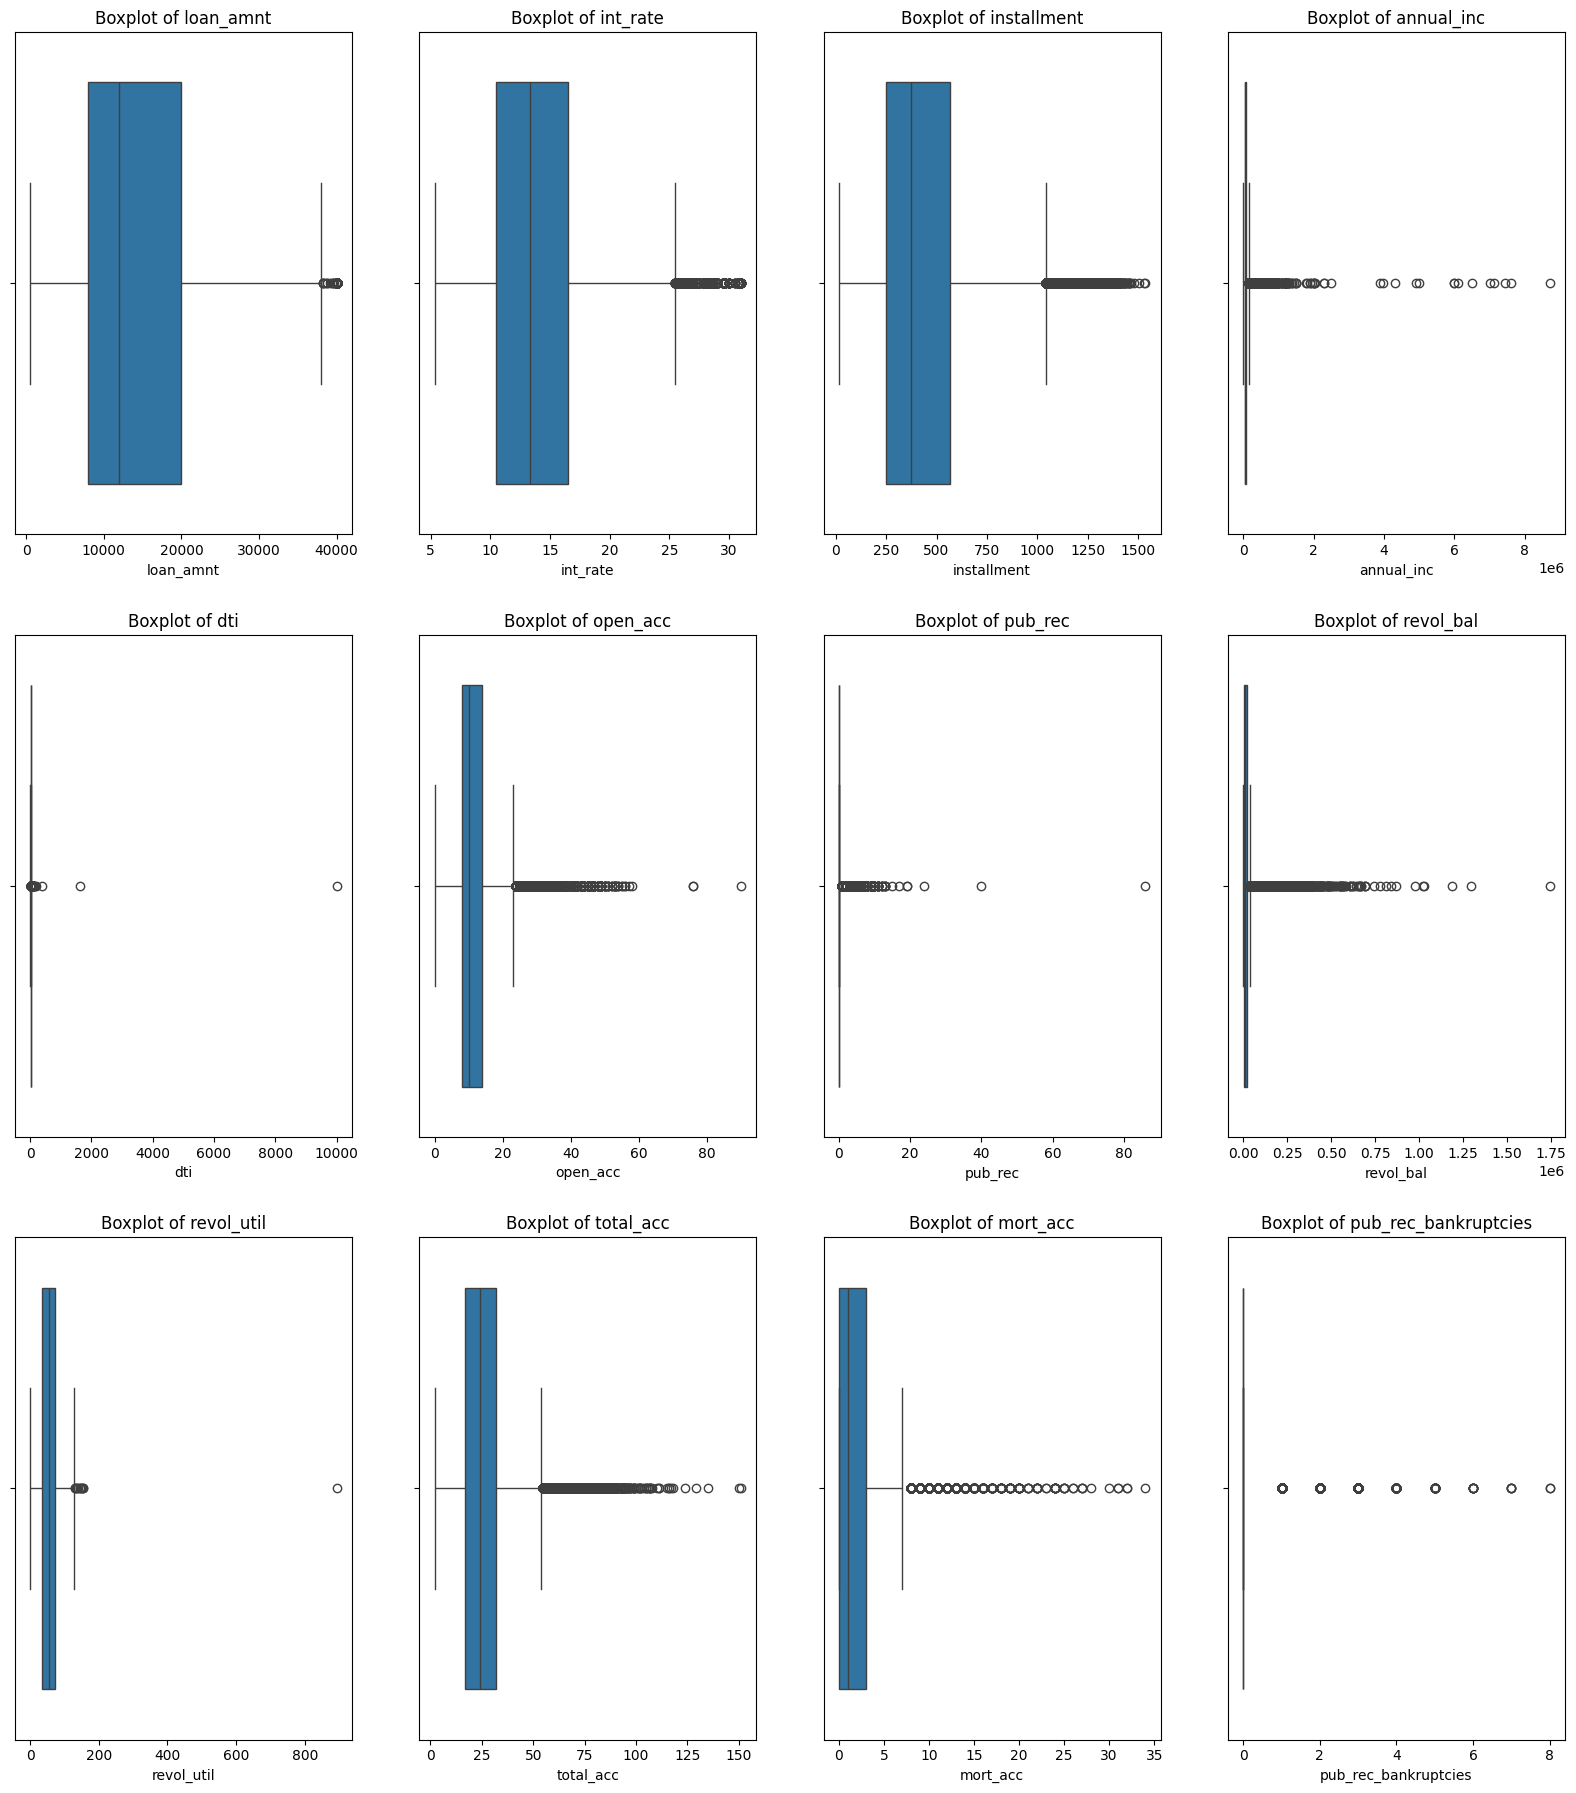

In [30]:
i = 1
plt.figure(figsize=(20,30))
for col in numerical_data:
    plt.subplot(4,4,i)   
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    i+=1
plt.show()

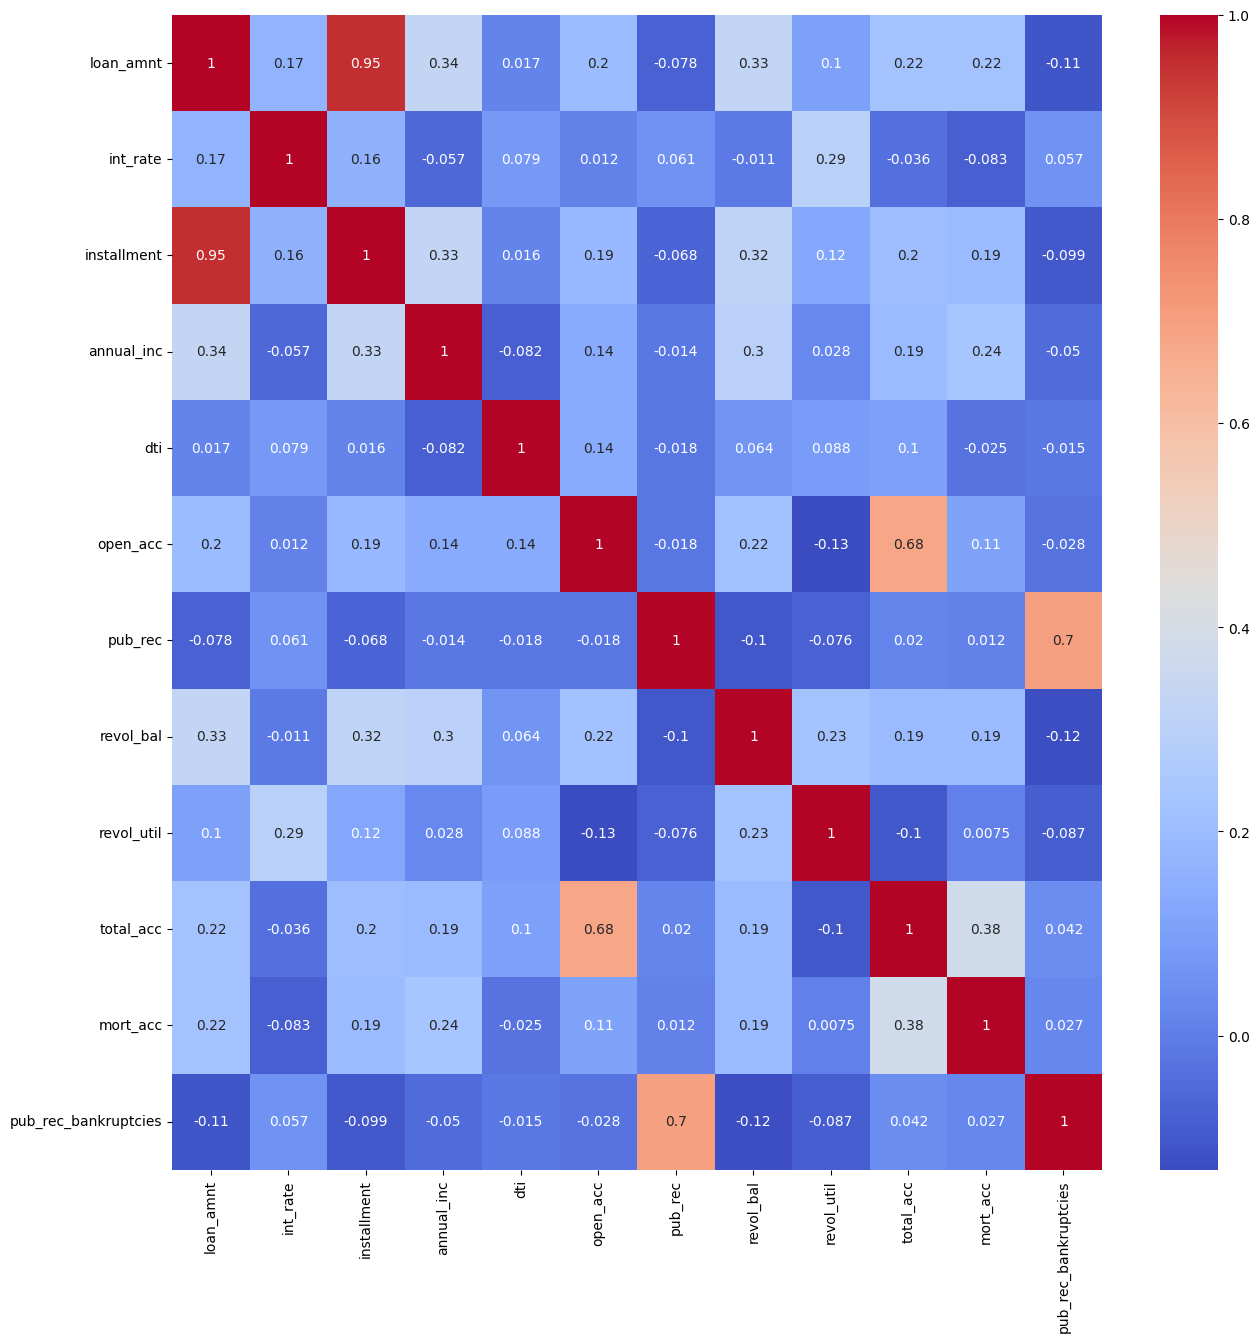

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(data=data[numerical_data].corr(), annot=True, cmap='coolwarm')
plt.show()

#### Bivariate

In [32]:
data[categorical_data].head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"


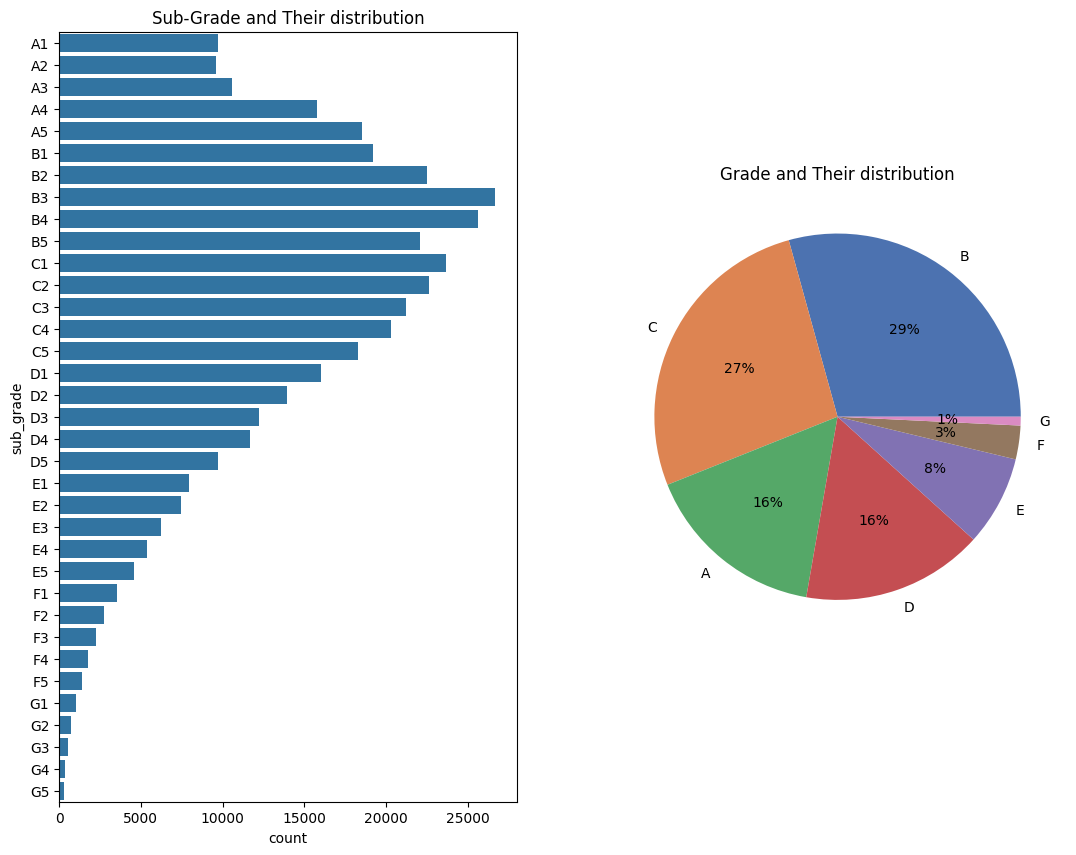

In [33]:
plt.figure(figsize=(13,10))
plt.subplot(1,2,2)
plt.pie(data['grade'].value_counts().values, labels=data['grade'].value_counts().index,
colors=sns.color_palette('deep'), autopct='%.0f%%')
plt.title('Grade and Their distribution')
plt.subplot(1,2,1)
sns.countplot(data['sub_grade'].sort_values())
plt.title('Sub-Grade and Their distribution')
plt.show()

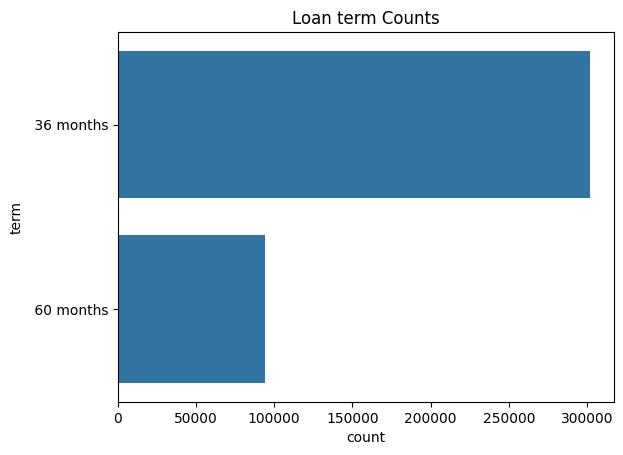

In [34]:
sns.countplot(data['term'].sort_values())
plt.title('Loan term Counts')
plt.show()

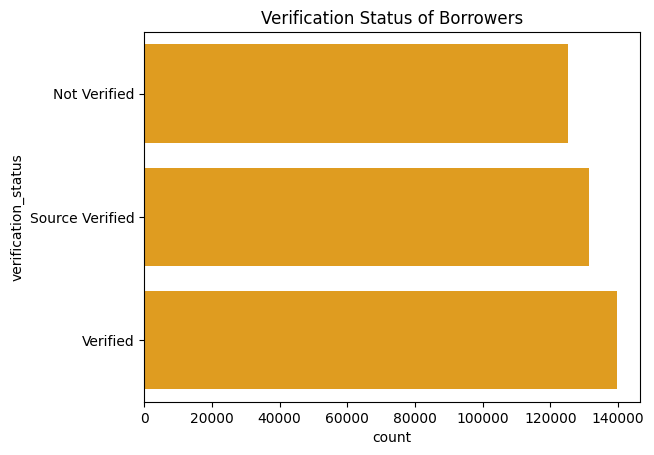

In [35]:
sns.countplot(data['verification_status'].sort_values() , color='orange')
plt.title('Verification Status of Borrowers')
plt.show()


In [36]:
data[categorical_data].describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394274,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48816,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


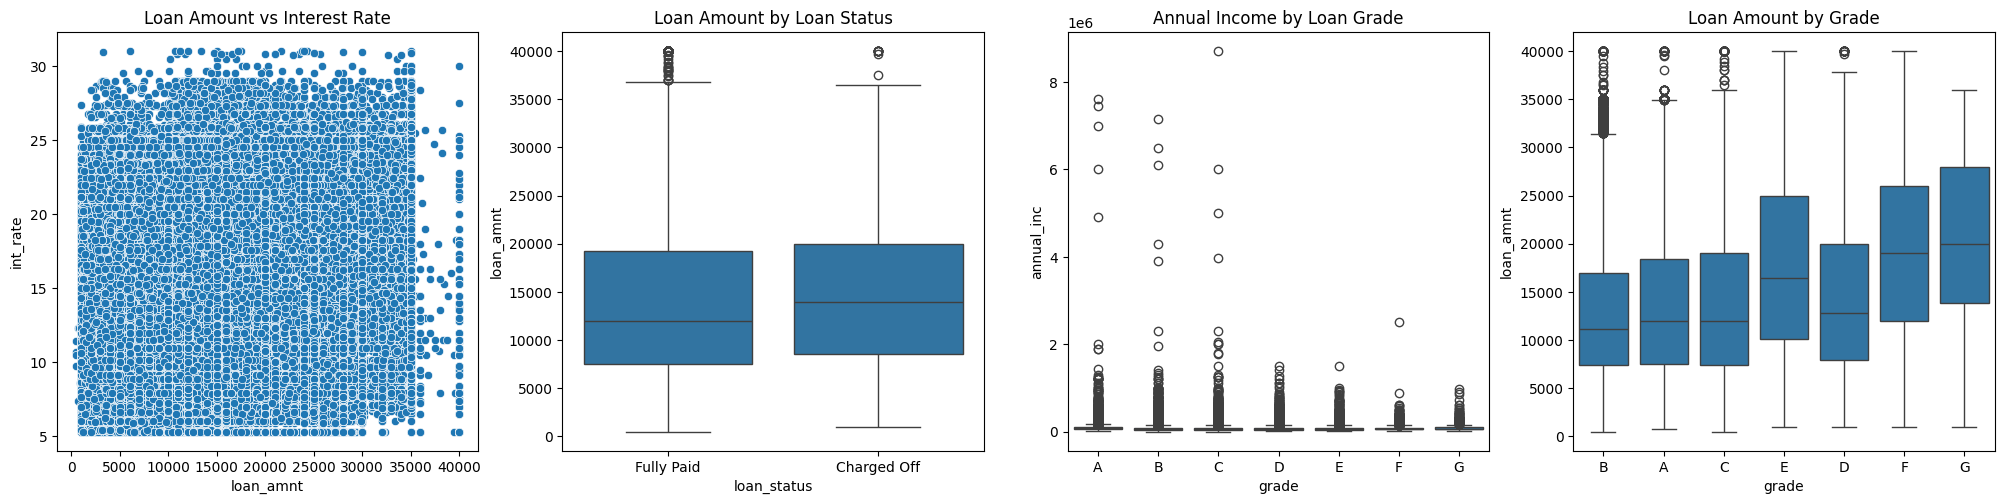

In [37]:
plt.figure(figsize=(25,25))
plt.subplot(4,4,1)
# Scatter plot between loan amount and interest rate
sns.scatterplot(x='loan_amnt', y='int_rate', data=data)
plt.title('Loan Amount vs Interest Rate')
plt.subplot(4,4,2)
sns.boxplot(x=target_variable, y=data['loan_amnt'])
plt.title('Loan Amount by Loan Status')
plt.subplot(4,4,3)
sns.boxplot(x='grade', y='annual_inc', data=data, order=sorted(data['grade'].unique()))
plt.title('Annual Income by Loan Grade')
plt.subplot(4,4,4)
sns.boxplot(x='grade', y='loan_amnt', data=data)
plt.title('Loan Amount by Grade')
plt.show()

home_ownership  ANY  MORTGAGE  NONE  OTHER    OWN    RENT
loan_status                                              
Charged Off       0     33632     7     16   7806   36212
Fully Paid        3    164716    24     96  29940  123578


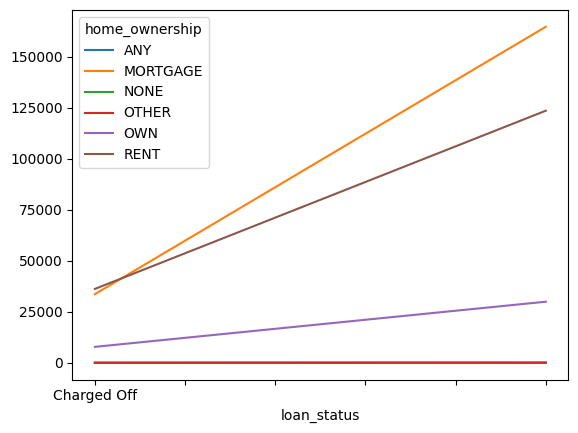

In [38]:
crosstab = pd.crosstab(target_variable, data['home_ownership'])
print(crosstab)
crosstab.plot()
plt.show()

### Comments:

#### a. On range of attributes
- Loan amount ranges from 500-40000
- Range of Interest Rate : 5.3% - 31%
- Average annual Income : 74203
- Average Debt to Income Ratio is : 7.4%
- Average number of open credit lines in the borrower's credit file : 11.3 
- Total Deregatory Records : 396030
- Average Revolving Balance : 15844.5

In [39]:

data['revol_bal'].mean()

15844.539853041437

#### b. Outliers of various attributes

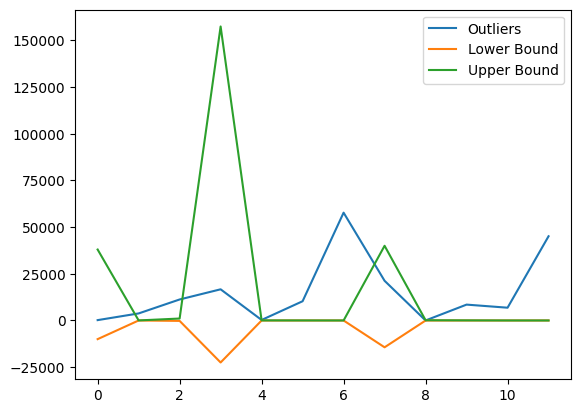

In [40]:
def detect_outliers_iqr(column):
 Q1 = data[column].quantile(0.25)
 Q3 = data[column].quantile(0.75)
 IQR = Q3 - Q1
 lower_bound = Q1 - 1.5 * IQR
 upper_bound = Q3 + 1.5 * IQR
 outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
 return outliers, lower_bound,upper_bound
outliers_summary_list = []

for col in numerical_data:
 outliers, lower, upper = detect_outliers_iqr(col)

 # Append the results as a dictionary to the list
 outliers_summary_list.append({
 'Column': col,
 'Outliers': len(outliers),
 'Lower Bound': lower,
 'Upper Bound': upper
 })
outliers_summary = pd.DataFrame(outliers_summary_list)
outliers_summary.plot()
plt.show()

# 2. Data Preprocessing

#### b. Missing value treatment

In [41]:
duplicate=data.duplicated()
duplicate.sum()
duplicate.shape
data.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48816
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

#### b. Missing value treatment

In [42]:
# Identify Missing Values
missing_values_data = data.isnull().sum()
print( missing_values_data[missing_values_data > 0])

num_cols = data.select_dtypes(include=['number']).columns
cat_cols = data.select_dtypes(include=['object']).columns

emp_title               22927
emp_length              18301
title                    1756
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64


In [43]:
#the percentage of missing values
missing_percentage = round((missing_values_data / len(data)) * 100,2)
missing_data_summary = pd.DataFrame({
 'Missing Values': missing_values_data[missing_values_data > 0],
 'Percentage (%)': missing_percentage[missing_values_data > 0]
}).sort_values(by='Percentage (%)', ascending=False)
missing_data_summary

,Missing Values,Percentage (%)
mort_acc,37795,9.54
emp_title,22927,5.79
emp_length,18301,4.62
title,1756,0.44
pub_rec_bankruptcies,535,0.14
revol_util,276,0.07


Imputes missing values in numerical columns by replacing them with the average of the 3 nearest neighbors' values using the KNN imputation method.

In [44]:
# KNNImputer is a scikit-learn imputer that fills missing values using the k-nearest neighbors algorithm
from sklearn.impute import KNNImputer

#Specifies that the imputer will use the 3 nearest neighbors to compute the missing values
knn_imputer = KNNImputer(n_neighbors=3)
data[num_cols] = knn_imputer.fit_transform(data[num_cols])

In [45]:
data[num_cols].isnull().sum()

loan_amnt               0
int_rate                0
installment             0
annual_inc              0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

#### c. Outlier Treatment

In [46]:
#outliers in numerical columns using z-scores and replaces them with the column's median to maintain data integrity
from scipy import stats

num_cols = data.select_dtypes(include=['number']).columns
def zscore_outlier_treatment(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    df[column] = np.where(z_scores > threshold, np.median(df[column]), df[column])


for col in num_cols:
    zscore_outlier_treatment(data, col)


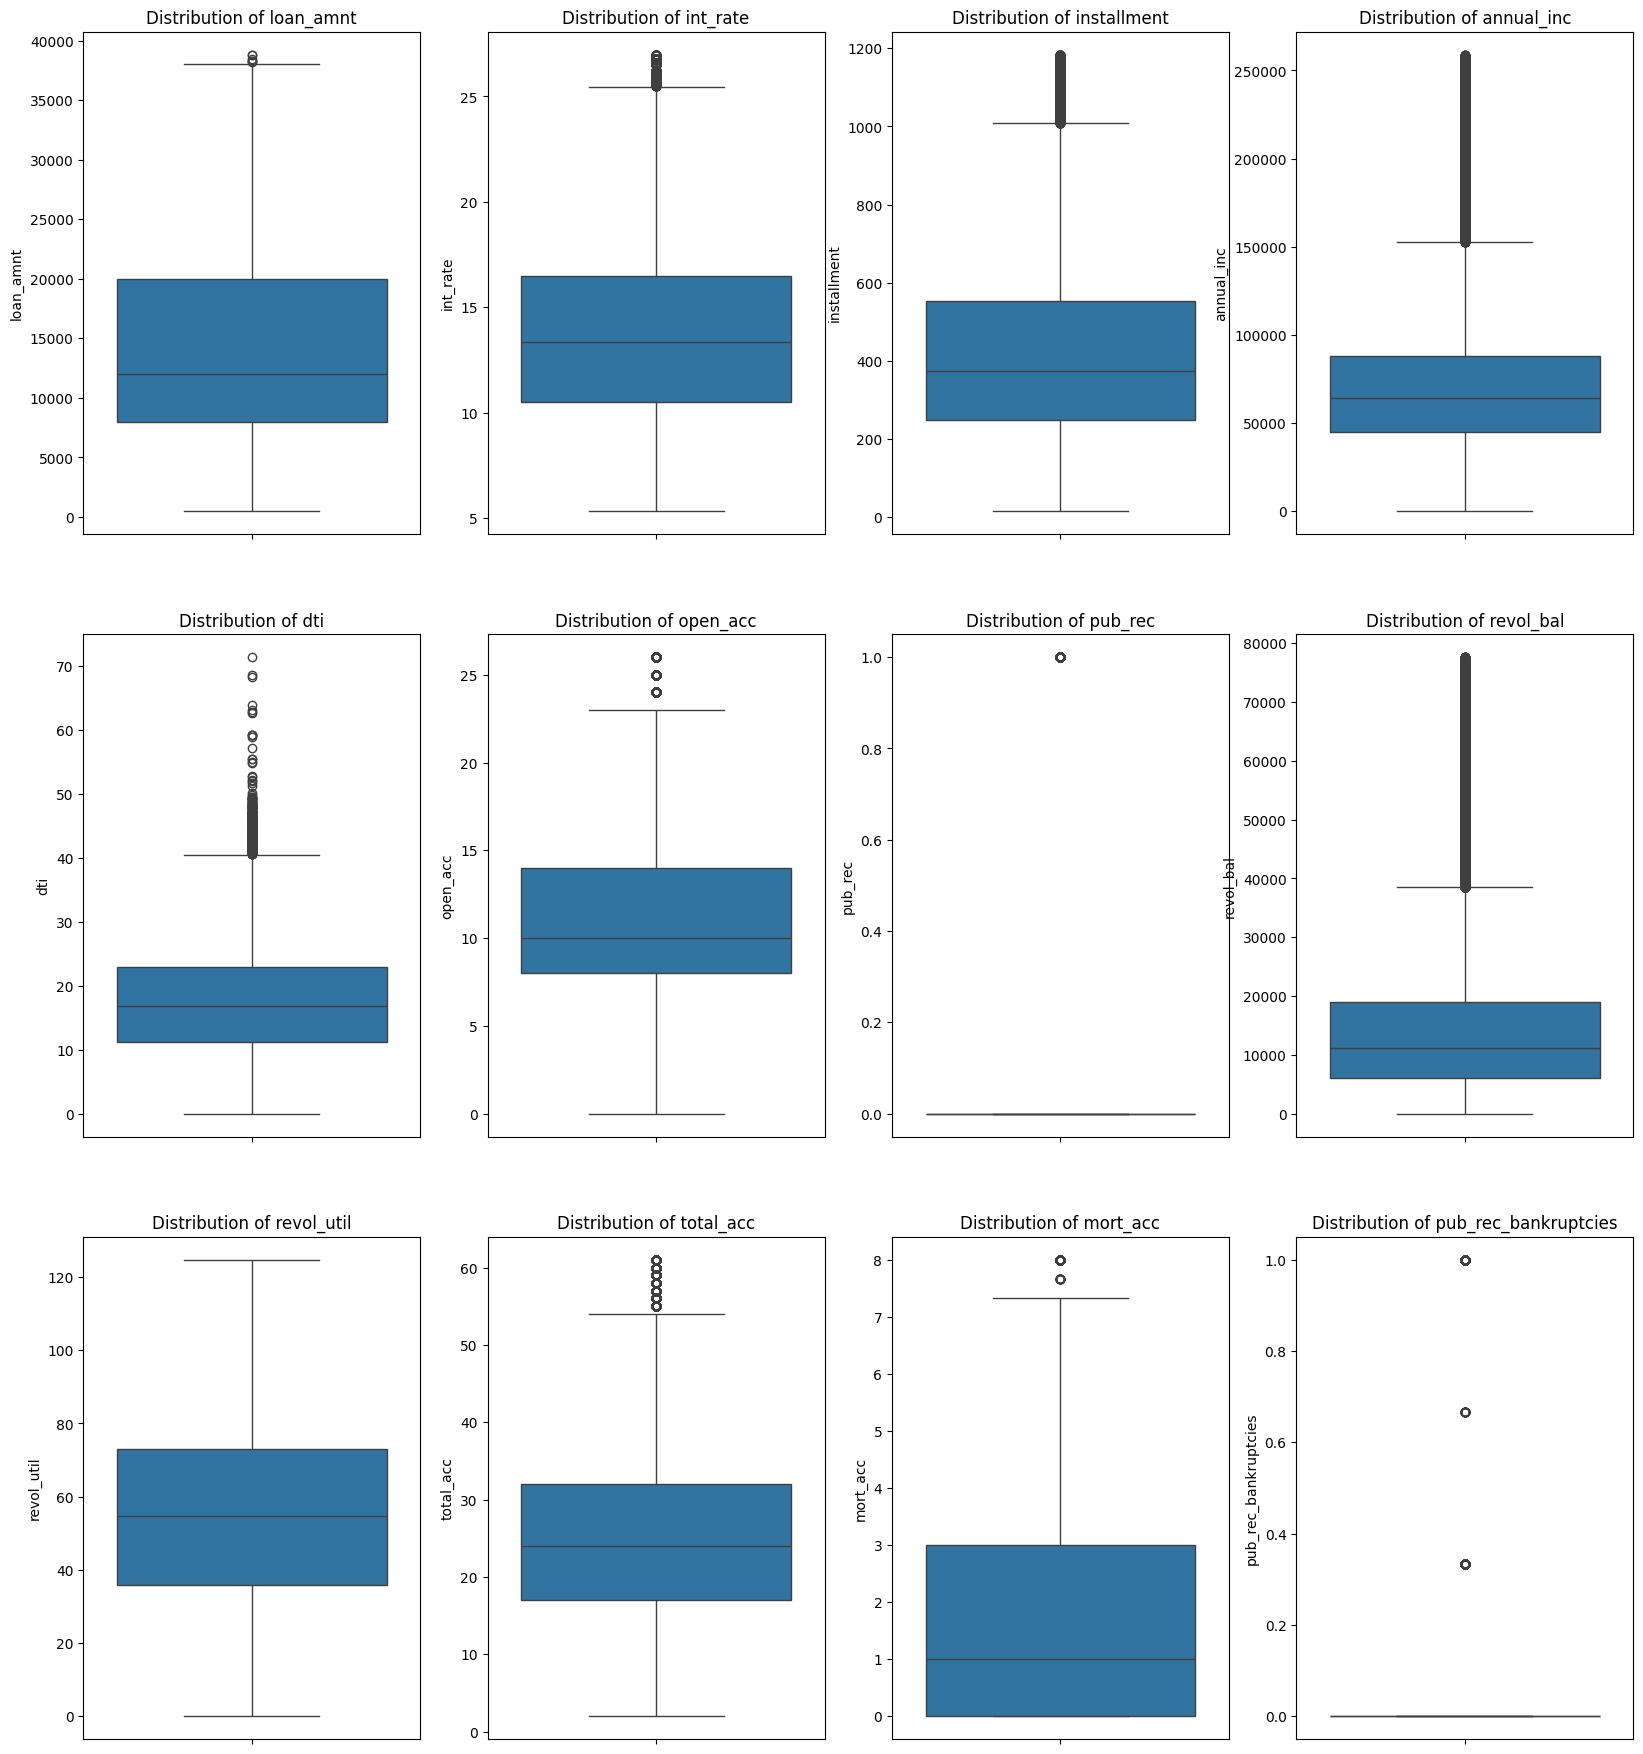

In [47]:
# Outlier plot
# Extraction upper,lower bound & outlier
i = 1
plt.figure(figsize=(20,30))
for col in numerical_data:
    plt.subplot(4,4,i)
    sns.boxplot(data[col])
    plt.title(f"Distribution of {col}")
    i+=1
plt.show()  

#### d. Encoding categorical columns

In [48]:
data[categorical_data].head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"


encoding 'term' column

In [49]:
print(data['term'].unique())

[' 36 months' ' 60 months']


In [50]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Transform the 'term' column
term_encoded = encoder.fit_transform(data[['term']])

# Create a DataFrame for the encoded data
data['term'] = pd.DataFrame(term_encoded, columns=encoder.get_feature_names_out(['term']))
from sklearn.preprocessing import OneHotEncoder



Encoding 'grade'


In [51]:
data['grade'].value_counts().index

Index(['B', 'C', 'A', 'D', 'E', 'F', 'G'], dtype='object', name='grade')

In [52]:
# Define a mapping for grades
grade_map={'A':1,"B":2,'C':3,'D':4,'E':5,'F':6,'G':7}

# Apply the mapping to encode the grade column
data['grade']=data['grade'].map(grade_map)

Encoding Sub_grad

In [53]:
data['sub_grade'].value_counts().index.sort_values()

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2',
       'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4',
       'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object', name='sub_grade')

In [54]:
# Define a mapping for grades
sub_grade_map={'A1':1, 'A2':2, 'A3':3, 'A4':4, 'A5':5, 'B1':6, 'B2':7, 'B3':8, 'B4':9, 'B5':10, 'C1':11, 'C2':12,'C3':13, 'C4':14, 'C5':15, 'D1':16, 'D2':17, 'D3':18, 'D4':19, 'D5':20, 'E1':21, 'E2':22, 'E3':23, 'E4':24,
       'E5':25, 'F1':26, 'F2':27, 'F3':28, 'F4':29, 'F5':30, 'G1':31, 'G2':32, 'G3':33, 'G4':34, 'G5':35}

# Apply the mapping to encode the grade column
data['sub_grade']=data['sub_grade'].map(sub_grade_map)

Encoding emp_title

In [55]:
print(data['emp_title'].value_counts())

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64


Performing Target encoding of this column

In [56]:
# loan_status is categorical, convert to numeric
data['loan_status'] = data['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})
data['loan_status']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 396030, dtype: int64

In [57]:
#replaces categorical values in the emp_title column with their corresponding mean loan_status values, filling missing mappings with the global mean of loan_status.

emp_title_target_mean = data.groupby('emp_title')['loan_status'].mean()
data['emp_title'] = data['emp_title'].map(emp_title_target_mean)
global_mean = data['loan_status'].mean()
data['emp_title'] = data['emp_title'].fillna(global_mean)
print(data[['emp_title', 'loan_status']])

        emp_title  loan_status
0        0.752809            1
1        0.666667            1
2        0.818182            1
3        1.000000            1
4        0.000000            0
...           ...          ...
396025   1.000000            1
396026   0.779570            1
396027   0.731343            1
396028   1.000000            1
396029   0.782609            1

[396030 rows x 2 columns]


emp_length

In [58]:
data['emp_length'].value_counts().index

Index(['10+ years', '2 years', '< 1 year', '3 years', '5 years', '1 year',
       '4 years', '6 years', '7 years', '8 years', '9 years'],
      dtype='object', name='emp_length')

In [59]:
emp_length_map={'10+ years':10, '2 years':2, '< 1 year': .5, '3 years':3, '5 years':5, '1 year':1,
 '4 years':4, '6 years':6, '7 years':7, '8 years':8, '9 years':9,'Not Provided':0.1}
data['emp_length'] = data['emp_length'].map(emp_length_map)

home_ownership encoding

In [60]:
data['home_ownership'].value_counts().index.sort_values()


Index(['ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT'], dtype='object', name='home_ownership')

In [61]:
home_ownership_map={'ANY':1, 'MORTGAGE':13, 'NONE':14, 'OTHER':15, 'OWN':15.1, 'RENT':18}
data['home_ownership']=data['home_ownership'].map(home_ownership_map)

verification_status

In [62]:
data['verification_status'].value_counts().index.sort_values()

Index(['Not Verified', 'Source Verified', 'Verified'], dtype='object', name='verification_status')

In [63]:
verification_status_map={'Not Verified':0, 'Source Verified':1, 'Verified':0.5}
data['verification_status']=data['verification_status'].map(verification_status_map)

issue_d

In [64]:
data['issue_d'].value_counts().index.sort_values()

Index(['Apr-2008', 'Apr-2009', 'Apr-2010', 'Apr-2011', 'Apr-2012', 'Apr-2013',
       'Apr-2014', 'Apr-2015', 'Apr-2016', 'Aug-2007',
       ...
       'Sep-2007', 'Sep-2008', 'Sep-2009', 'Sep-2010', 'Sep-2011', 'Sep-2012',
       'Sep-2013', 'Sep-2014', 'Sep-2015', 'Sep-2016'],
      dtype='object', name='issue_d', length=115)

In [65]:
data['issue_d']=pd.to_datetime(data['issue_d'], format='%b-%Y')
data['issue_d'] =data['issue_d'].apply(lambda x: (x.year*10 + x.month)/1000)


purpose

In [66]:
data['purpose'].value_counts().index.sort_values()

Index(['car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'wedding'],
      dtype='object', name='purpose')

In [67]:
purpose_map={'car':1, 'credit_card':1.1, 'debt_consolidation':2, 'educational':3,
 'home_improvement':4, 'house':4.1, 'major_purchase':4.2, 'medical':4.3, 'moving':4.4,
 'other':5, 'renewable_energy':6, 'small_business':7, 'vacation':8, 'wedding':9}
data['purpose']=data['purpose'].map(purpose_map)

title encoding

In [68]:
data['title'].value_counts().index.sort_values()

Index(['\tcredit_card', '\tdebt_consolidation', '\tother', '\tsmall_business',
       '      debt consolidation', '   HITEK  EQUIPMENT ', '  A lending hand',
       '  Personal loan ', '  Three year debit free',
       '  debt consolidation cards and medical',
       ...
       'zero debt', 'zero dept', 'zero interest', 'zerodebt', 'zeusamoose',
       'zipcar', 'zonball Loan', 'zxcvb', '~Life Reorganization~',
       '~Summer Fun~'],
      dtype='object', name='title', length=48816)

performing Target Encoding

In [69]:
title_target_mean = data.groupby('title')['loan_status'].mean()
data['title'] = data['title'].map(title_target_mean)
global_mean = data['loan_status'].mean()
data['title']=data['title'].fillna(global_mean)

earliest_cr_line Encoding

In [70]:
data['earliest_cr_line'].value_counts().index.sort_values()

Index(['Apr-1955', 'Apr-1958', 'Apr-1960', 'Apr-1961', 'Apr-1962', 'Apr-1963',
       'Apr-1964', 'Apr-1965', 'Apr-1966', 'Apr-1967',
       ...
       'Sep-2004', 'Sep-2005', 'Sep-2006', 'Sep-2007', 'Sep-2008', 'Sep-2009',
       'Sep-2010', 'Sep-2011', 'Sep-2012', 'Sep-2013'],
      dtype='object', name='earliest_cr_line', length=684)

In [71]:
data['earliest_cr_line']=pd.to_datetime(data['earliest_cr_line'], format='%b-%Y')
data['earliest_cr_line'] =data['earliest_cr_line'].apply(lambda x: (x.year*10 + x.month)/1000)

initial_list_status Encoding

In [72]:
data['initial_list_status'].value_counts().index.sort_values()

Index(['f', 'w'], dtype='object', name='initial_list_status')

In [73]:
initial_list_status_map={'f':1,'w':0}
data['initial_list_status']=data['initial_list_status'].map(initial_list_status_map)

application_type Encoding

In [74]:
data['application_type'].value_counts().index.sort_values()

Index(['DIRECT_PAY', 'INDIVIDUAL', 'JOINT'], dtype='object', name='application_type')

In [75]:
application_type_map={'DIRECT_PAY':1, 'INDIVIDUAL':2, 'JOINT':3}
data['application_type']=data['application_type'].map(application_type_map)

address Encoding

In [76]:
data['address'].value_counts().index.sort_values()


Index(['000 Adam Station Apt. 329\r\nAshleyberg, AZ 22690',
       '000 Adrian Cliffs\r\nRandyton, LA 22690',
       '000 Alexandria Street\r\nPort Richard, FL 22690',
       '000 Amber Court\r\nLake Pamelatown, IN 00813',
       '000 Amy Pines Suite 498\r\nSouth Susan, ND 22690',
       '000 Anderson Hills Suite 654\r\nJensenchester, NH 29597',
       '000 Anderson Parks\r\nGrahamton, FL 30723',
       '000 Annette Fords\r\nKristenland, CA 11650',
       '000 April Island Suite 314\r\nLestad, IN 05113',
       '000 Barajas Place\r\nNew Kristenview, AR 30723',
       ...
       'Unit 9992 Box 2617\r\nDPO AA 05113',
       'Unit 9992 Box 7192\r\nDPO AA 22690',
       'Unit 9993 Box 6811\r\nDPO AP 30723',
       'Unit 9994 Box 8217\r\nDPO AP 30723',
       'Unit 9994 Box 9232\r\nDPO AP 48052',
       'Unit 9995 Box 6277\r\nDPO AE 48052',
       'Unit 9995 Box 8360\r\nDPO AP 00813',
       'Unit 9996 Box 9255\r\nDPO AP 05113',
       'Unit 9997 Box 3228\r\nDPO AA 11650',
       'Unit 9997

using regex to extract state and zip code

In [77]:
import re
def encode_addres(data,col):
 data[col]=data[col].apply(lambda x: re.search(r'\b\d{5}\b',x).group() if re.search(r'\b\d{5}\b',x)
else "")
 return data[col]
data['address']=encode_addres(data,'address')
data['address']


0         22690
1         05113
2         87025
3         00813
4         11650
          ...  
396025    12951
396026    05113
396027    70466
396028    29597
396029    48052
Name: address, Length: 396030, dtype: object

In [78]:
global_mean = data['loan_status'].mean()
data['address']=data['address'].fillna(global_mean)

Categorical columns encoded

In [79]:
data[categorical_data].head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,0.0,2,9,0.752809,10.0,18.0,0.0,20.151,1,8.0,0.794991,19.906,0,2,22690
1,0.0,2,10,0.666667,4.0,13.0,0.0,20.151,1,2.0,0.769873,20.047,1,2,05113
2,0.0,2,8,0.818182,0.5,18.0,1.0,20.151,1,1.1,0.807194,20.078,1,2,87025
3,0.0,1,2,1.000000,6.0,18.0,0.0,20.151,1,1.1,0.807194,20.069,1,2,00813
4,1.0,3,15,0.000000,9.0,13.0,0.5,20.134,0,1.1,0.910420,19.993,1,2,11650


### Spliting data

In [80]:
from sklearn.model_selection import train_test_split
y=data['loan_status']
X=data.drop('loan_status', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, data['loan_status'], test_size=0.2,random_state=0)


#### e. Check for imbalance dataset and balancing it

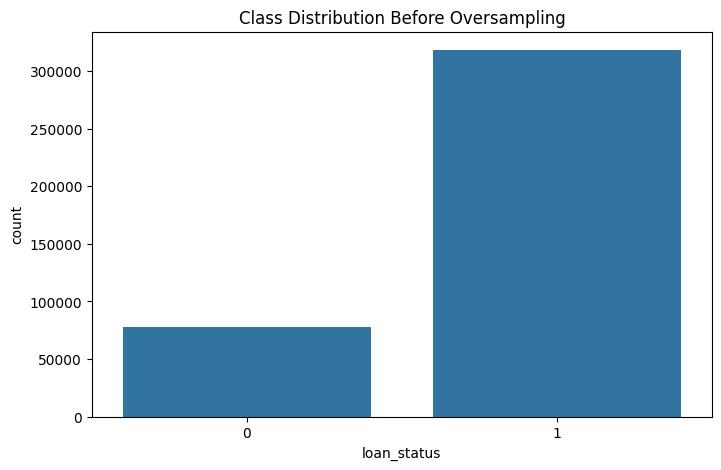

In [81]:
from sklearn.utils import resample

# Target column
target_col = 'loan_status'

# Class distribution before oversampling
class_counts = data[target_col].value_counts()

plt.figure(figsize=(8, 5))
sns.countplot(x=target_col, data=data)
plt.title("Class Distribution Before Oversampling")
plt.show()


as we can see the data is imbalaced


Class Distribution After Oversampling:
loan_status
1    318357
0    318357
Name: count, dtype: int64


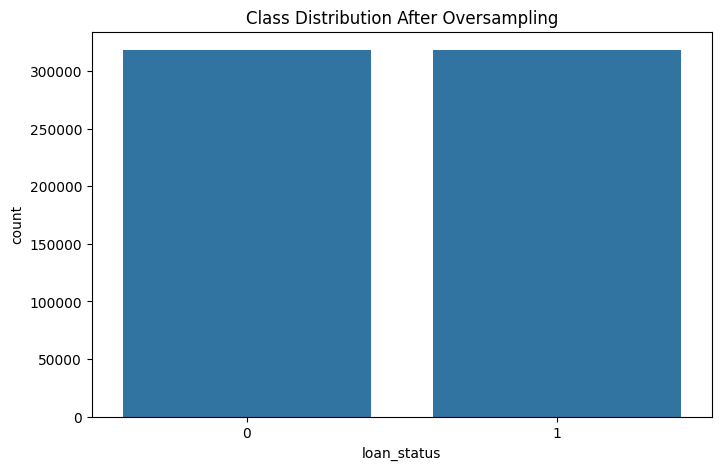


Balanced dataset saved as 'balanced_data.csv'.


In [82]:
# Separate majority and minority classes
majority_class = data[data[target_col] == data[target_col].value_counts().idxmax()]
minority_class = data[data[target_col] == data[target_col].value_counts().idxmin()]

# Oversample the minority class
minority_oversampled = resample(minority_class,
                                replace=True, 
                                n_samples=len(majority_class), 
                                random_state=42)

# Combine the majority class and oversampled minority class
balanced_data = pd.concat([majority_class, minority_oversampled])

# Check the new class distribution
print("\nClass Distribution After Oversampling:")
print(balanced_data[target_col].value_counts())

# Plot the balanced dataset
plt.figure(figsize=(8, 5))
sns.countplot(x=target_col, data=balanced_data)
plt.title("Class Distribution After Oversampling")
plt.show()

# Save the balanced dataset to a CSV file
balanced_data.to_csv('balanced_data.csv', index=False)
print("\nBalanced dataset saved as 'balanced_data.csv'.")

#### f. Scaling

In [83]:
from sklearn.preprocessing import StandardScaler
data=pd.read_csv('balanced_data.csv')
data.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,0.0,11.44,329.48,2,9,0.752809,10.0,18.0,117000.0,...,16.0,0.0,36369.0,41.8,25.0,0,2,0.0,0.0,22690
1,8000.0,0.0,11.99,265.68,2,10,0.666667,4.0,13.0,65000.0,...,17.0,0.0,20131.0,53.3,27.0,1,2,3.0,0.0,5113
2,15600.0,0.0,10.49,506.97,2,8,0.818182,0.5,18.0,43057.0,...,13.0,0.0,11987.0,92.2,26.0,1,2,0.0,0.0,87025
3,7200.0,0.0,6.49,220.65,1,2,1.000000,6.0,18.0,54000.0,...,6.0,0.0,5472.0,21.5,13.0,1,2,0.0,0.0,813
4,20000.0,0.0,13.33,677.07,3,13,0.793103,10.0,13.0,86788.0,...,8.0,0.0,25757.0,100.6,23.0,1,2,4.0,0.0,30723
5,18000.0,0.0,5.32,542.07,1,1,1.000000,2.0,13.0,125000.0,...,8.0,0.0,4178.0,4.9,25.0,1,2,3.0,0.0,22690
6,13000.0,0.0,11.14,426.47,2,7,0.812500,10.0,18.0,46000.0,...,11.0,0.0,13425.0,64.5,15.0,1,2,0.0,0.0,30723
7,18900.0,1.0,10.99,410.84,2,8,0.857143,10.0,18.0,103000.0,...,13.0,0.0,18637.0,32.9,40.0,0,2,3.0,0.0,22690
8,26300.0,0.0,16.29,928.40,3,15,1.000000,3.0,13.0,115000.0,...,13.0,0.0,22171.0,82.4,37.0,1,2,1.0,0.0,813
9,10000.0,0.0,13.11,337.47,2,9,0.848485,2.0,18.0,95000.0,...,5.0,1.0,4702.0,64.4,26.0,1,2,4.0,1.0,40245


In [84]:
scaler_std=StandardScaler()
scaled_data=data.drop('loan_status',axis=1)
scaled_data[scaled_data.columns]=scaler_std.fit_transform(scaled_data)
scaled_data['loan_status']=data['loan_status']
scaled_data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status
0,-0.532544,-0.644751,-0.666551,-0.424571,-0.783395,-0.644195,0.222898,1.133478,1.119484,1.313832,...,-0.384436,1.881204,-0.558154,0.011651,-1.220498,0.001576,-0.864891,-0.350699,-0.718279,1
1,-0.770292,-0.644751,-0.544849,-0.699485,-0.783395,-0.498363,-0.023976,-0.540229,-0.987373,-0.114756,...,-0.384436,0.498190,-0.082613,0.190394,0.819338,0.001576,0.750738,-0.350699,-1.323683,1
2,0.133151,-0.644751,-0.876765,0.340233,-0.783395,-0.790028,0.410249,-1.516559,1.119484,-0.717593,...,-0.384436,-0.195447,1.525953,0.101022,0.819338,0.001576,-0.864891,-0.350699,1.497612,1
3,-0.865391,-0.644751,-1.761873,-0.893519,-1.504360,-1.665022,0.931318,0.017673,1.119484,-0.416958,...,-0.384436,-0.750339,-1.397585,-1.060807,0.819338,0.001576,-0.864891,-0.350699,-1.471788,1
4,0.656197,-0.644751,-0.248338,1.073194,-0.062429,-0.060866,0.338377,1.133478,-0.987373,0.483822,...,-0.384436,0.977365,1.873304,-0.167092,0.819338,0.001576,1.289281,-0.350699,-0.441598,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636709,-0.532544,-0.644751,-0.173103,-0.378465,-0.783395,-0.498363,-1.218094,1.133478,-0.987373,0.709429,...,-0.384436,-0.901178,-0.831072,0.458508,0.819338,0.001576,1.289281,2.853647,1.087534,0
636710,-0.294796,1.550987,2.506562,-0.302842,2.100467,2.418286,0.214848,0.575576,-0.987373,2.769893,...,-0.384436,2.211670,1.145521,1.799081,-1.220498,0.001576,0.750738,-0.350699,0.927270,0
636711,-0.294796,-0.644751,0.512855,-0.006641,0.658536,0.522464,-1.934564,-1.516559,-0.987373,-0.691576,...,-0.384436,-1.216398,-2.286639,-1.239551,0.819338,0.001576,-0.864891,-0.350699,0.155265,0
636712,0.656197,1.550987,0.778388,0.342732,0.658536,0.814129,0.425574,-1.098132,1.119484,0.022608,...,-0.384436,0.167980,-0.434100,-0.435207,0.819338,0.001576,-0.864891,-0.350699,0.155265,0


In [85]:
data.to_csv('scaled_data.csv', index=False)

# 3. Model building

#### a. Build the Logistic Regression model

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
Log_R_model=LogisticRegression(C=5, penalty='l1', solver='liblinear')
data=pd.read_csv('scaled_data.csv')
data.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,0.0,11.44,329.48,2,9,0.752809,10.0,18.0,117000.0,...,16.0,0.0,36369.0,41.8,25.0,0,2,0.0,0.0,22690
1,8000.0,0.0,11.99,265.68,2,10,0.666667,4.0,13.0,65000.0,...,17.0,0.0,20131.0,53.3,27.0,1,2,3.0,0.0,5113
2,15600.0,0.0,10.49,506.97,2,8,0.818182,0.5,18.0,43057.0,...,13.0,0.0,11987.0,92.2,26.0,1,2,0.0,0.0,87025
3,7200.0,0.0,6.49,220.65,1,2,1.000000,6.0,18.0,54000.0,...,6.0,0.0,5472.0,21.5,13.0,1,2,0.0,0.0,813
4,20000.0,0.0,13.33,677.07,3,13,0.793103,10.0,13.0,86788.0,...,8.0,0.0,25757.0,100.6,23.0,1,2,4.0,0.0,30723


In [87]:
y=data['loan_status']
y

0         1
1         1
2         1
3         1
4         1
         ..
636709    0
636710    0
636711    0
636712    0
636713    0
Name: loan_status, Length: 636714, dtype: int64

In [88]:
X=data.drop('loan_status',axis=1)
X.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,0.0,11.44,329.48,2,9,0.752809,10.0,18.0,117000.0,...,16.0,0.0,36369.0,41.8,25.0,0,2,0.0,0.0,22690
1,8000.0,0.0,11.99,265.68,2,10,0.666667,4.0,13.0,65000.0,...,17.0,0.0,20131.0,53.3,27.0,1,2,3.0,0.0,5113
2,15600.0,0.0,10.49,506.97,2,8,0.818182,0.5,18.0,43057.0,...,13.0,0.0,11987.0,92.2,26.0,1,2,0.0,0.0,87025
3,7200.0,0.0,6.49,220.65,1,2,1.000000,6.0,18.0,54000.0,...,6.0,0.0,5472.0,21.5,13.0,1,2,0.0,0.0,813
4,20000.0,0.0,13.33,677.07,3,13,0.793103,10.0,13.0,86788.0,...,8.0,0.0,25757.0,100.6,23.0,1,2,4.0,0.0,30723


In [89]:
X_train, X_test, y_train, y_test= train_test_split(X , y , test_size=0.2 , random_state=0)

In [90]:
# missing values in X_train and X_test using the specified strategy, then removes rows from X_train and y_train where y_train has missing values.
import numpy as np
from sklearn.impute import SimpleImputer

# or 'median', 'most_frequent'
imputer = SimpleImputer(strategy='mean')  
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
X_train = X_train[~np.isnan(y_train)]
y_train = y_train[~np.isnan(y_train)]


In [91]:
Log_R_model.fit(X_train,y_train)

LogisticRegression(C=5, penalty='l1', solver='liblinear')

In [92]:
Log_R_model.fit(X_train,y_train)
LogisticRegression(C=5, penalty='l1', solver='liblinear')
train_prediction=Log_R_model.predict(X_train)
test_prediction=Log_R_model.predict(X_test)

In [93]:
print(f'Training F1 score: {round(f1_score(y_train, train_prediction)*100, 2)}')
print(f'Testing F1 score: {round(f1_score(y_test, test_prediction)*100, 2)}')

Training F1 score: 84.34
Testing F1 score: 84.57


#### b. Display model coefficients with column names

In [94]:
coef_data=pd.DataFrame({
 'Feature': X.columns,
 'Coefficient': Log_R_model.coef_.flatten()
})
coef_data

,Feature,Coefficient
0,loan_amnt,-0.000018
1,term,-0.340496
2,int_rate,0.014702
3,installment,0.000198
4,grade,0.001773
5,sub_grade,-0.077550
6,emp_title,9.794598
7,emp_length,0.021018
8,home_ownership,-0.043622
9,annual_inc,0.000002


# 4. Results Evaluation

#### a. Confusion Matrix and comments

In [95]:
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test, test_prediction)
conf_matrix

array([[52505, 11256],
       [ 8757, 54825]], dtype=int64)

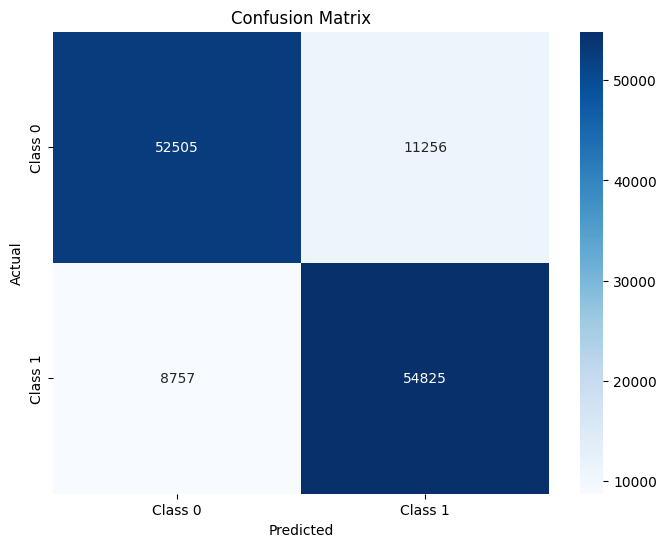

In [96]:
TN=conf_matrix[0,0]
FP=conf_matrix[0,1]
TP=conf_matrix[1,1]
FN=conf_matrix[1,0]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'],
yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### True Negetives : - 52484
- The Model correctly predicted the 0 class 
#### False Positives : - 11277
- Model incorrectly predicted class 1 for actual class 0.
#### True Positives : -54821
- Model correctly predicted class 1 (positive cases)
#### False Negatives : - 8761
- Model failed to predict class 1 for actual class 1.

#### Performance Metrics Derived

#### 1 = Accuracy

In [97]:

accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f'Proportion of correct predictions : {round(accuracy*100,2)}')



Proportion of correct predictions : 84.28


#### 2 = Precision

In [98]:
precision = TP / (TP + FP)
print(f'Proportion of positive predictions that are correct : {round(precision*100,2)}')

Proportion of positive predictions that are correct : 82.97


#### 3 = Recall

In [99]:
recall = TP / (TP + FN)
print(f'Proportion of actual positives correctly identified : {round(recall*100,2)}')

Proportion of actual positives correctly identified : 86.23


#### 4 = F1 Score

In [100]:
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Harmonic mean of precision and recall : {round(recall*100,2)}')

Harmonic mean of precision and recall : 86.23


High Recall (86.22%):
- The model performs well in identifying actual positive cases.


Good Precision (82.94%):
- Most positive predictions are correct.

### b. Classification Report and comments

In [101]:
from sklearn.metrics import classification_report
report = classification_report(y_test, test_prediction, target_names=['Fully Paid', 'Charged Off'])
print(report)

              precision    recall  f1-score   support

  Fully Paid       0.86      0.82      0.84     63761
 Charged Off       0.83      0.86      0.85     63582

    accuracy                           0.84    127343
   macro avg       0.84      0.84      0.84    127343
weighted avg       0.84      0.84      0.84    127343



Overall Accuracy: 84%
 Indicates that 84% of the model's predictions are correct.

Class-Specific Metrics:

##### Fully Paid:

Precision: 0.86 → Out of all cases predicted as "Fully Paid," 86% are correct.
 Recall: 0.82 → The model identifies only 82% of the actual "Fully Paid" cases.
 F1-Score: 0.84 → A relatively low score due to the imbalance between precision and recall.

##### Charged Off:

Precision: 0.83 → The model is very confident in predicting "Charged Off" cases.
 Recall: 0.86 → The model identifies almost all "Charged Off" cases.
 F1-Score: 0.85 → A strong balance between precision and recall for this class.

##### Macro Avg:

Precision (0.84), Recall (0.84), and F1-Score (0.84) reflect the unweighted average across both
classes.
 The lower recall (0.84) indicates that the model struggles with the minority class

##### Weighted Avg:

These averages are weighted by the support (i.e., the number of samples in each class).
 Indicates overall model performance:
 Precision: 0.84
 Recall: 0.84
 F1-Score: 0.84
 Low Recall for "Fully Paid" (0.82):

 - The model fails to identify 81% of the actual "Fully Paid" cases, leading to many false negatives.
 - This may be problematic if "Fully Paid" is a critical class for the analysis.

### c. AU-ROC Curve & comments

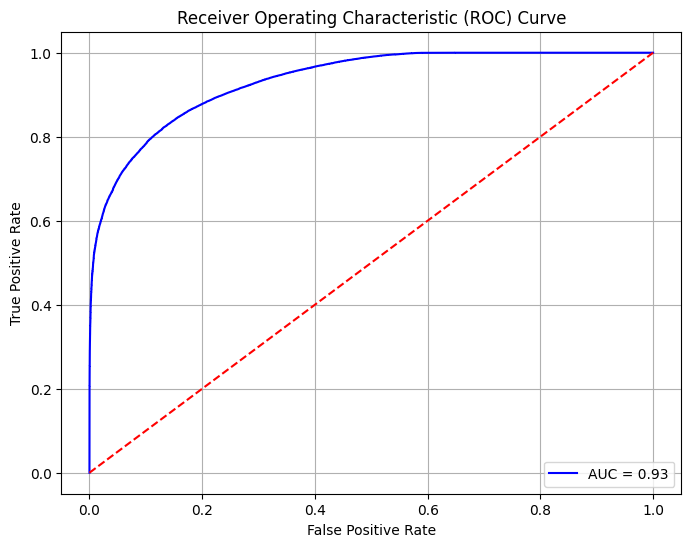

In [102]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = Log_R_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Indicates a strong model.

The classifier has good separation between positive and negative classes.
AUC = 0.93 <br>
 Excellent classifier; it can distinguish between the two classes effectively.

### d. Precision Recall Curve & comments

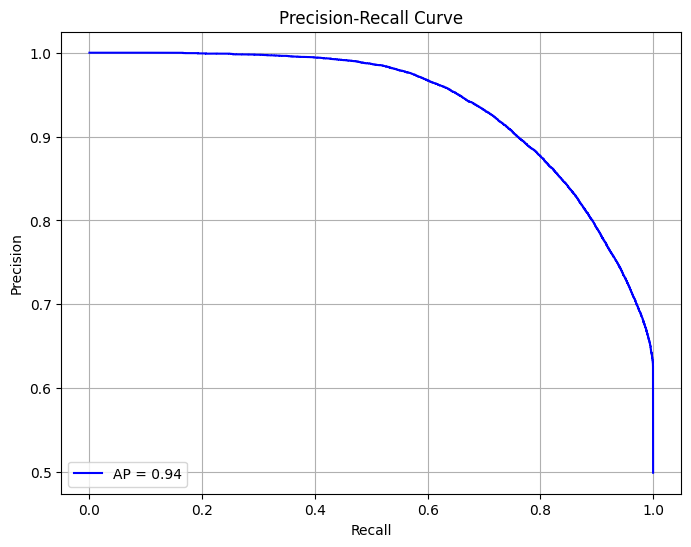

In [103]:
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()

 Has a precision-recall curve that reaches the top-right corner (precision = 1, recall = 1)

AP = 0.94 is excellent. <br>
 Indicates that the model maintains a good balance between precision and recall across different
thresholds.